# Data Science Project

Este proyecto tiene como objetivo el poder obtener conocimiento a partir de los datos presentes en un conjunto de datos (dataset, por su traducción en ingles), lo que permitirá poder comprobar una o varias hipotesis propuestas.

Para esto, se define lo siguiente:

- **Conjunto de datos.** Se elegió el conjunto de datos "futbol" que contiene información relacionada de diversos jugadores de distintos clubes de todo el mundo; esto con su información estadistica como jugador y su algunos datos personales.
  
  
- **Hipotesis a comprobar.** ¿Existe alguna relación entre la edad, nacionalidad, club, pierna preferida, posición, fecha de unión al club, prestamo, fecha de contrado valido, altura, peso y clausula de liberación para poder determinar el valor y precio de venta de un jugador? 

<img src="https://www.freewebheaders.com/wp-content/gallery/football/sports-soccer-stadium-night-scene-web-header.jpg" style="width: 100%"/>

## Importación de librerias

Se importando todas las librerias necesarias para este proyecto, donde las mas importante es **pandas** ya que permite la lectura, manipulación y almacenamiento de los datos.

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

## Lectura del conjunto de datos

Se lee el conjunto de datos elegido pero filtrando las columnas (variables, en Ciencia de Datos) unicamente necesarias, estas se describen a continuación.

- ID
- Age
- Nationality
- Club
- Value
- Wage
- Preferred Foot
- Position
- Joined
- Loaned From
- Contract Valid Until
- Height
- Weight
- Release Clause

Sin embargo, se renombran las columnas que poseen espacios con los mismos nombres pero sustituyendo los espacios con guiones bajos.

In [2]:
dataframe = (pd.read_csv("futbol.csv")).filter(["ID", "Age", "Nationality","Club","Value", "Wage", "Preferred Foot", "Position", "Joined","Loaned From", "Contract Valid Until", "Height", "Weight", "Release Clause"]).rename(columns={"Preferred Foot":'Preferred_foot', 'Loaned From': 'Loaned_from', 'Contract Valid Until':'Contract_Valid_Until', 'Release Clause': 'Release_clause'})

Posteriormente, se visualiza el dataframe (estructura que posee un conjunto de datos) leido.

In [3]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,"May 3, 2017",NaN,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,€143K


## Comprobación de los registros de datos

Debido a que el conjunto de datos elegido no fue elaborado por nosotros se procede a realizar una comprobación de los registros existentes en este, el cual tiene como objetivo de corroborar si existen registros nulos o vacios.

In [4]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,241
Value,0
Wage,0
Preferred_foot,48
Position,60
Joined,1553
Loaned_from,16943


**Nota importante:** teniendo en cuenta el contexto de los datos, se puede mencionar que los datos nulos mas importantes son todos los que no pertenescan a **Release_clause** porque estos pueden categorizarse de otra manera.

## Modificación de los registros de datos

Como primer paso, primer visualizamos los registros que se intersectan con valores nulos o vacios de acuerdo a los siguientes datos:

- Preferred_foot
- Position
- Joined
- Loaned_from
- Contract_Valid_Until
- Height
- Weight

In [5]:
dataframe[pd.isnull(dataframe[['Preferred_foot', 'Position', 'Joined', 'Loaned_from', 'Contract_Valid_Until','Height', 'Weight']]).all(axis=1)]

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
13236,177971,33,Scotland,Rochdale,€120K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,195380,29,Nicaragua,Boyacá Chicó FC,€300K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,139317,35,England,Notts County,€140K,€3K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,240437,20,Italy,Brescia,€425K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,209462,24,England,Hamilton Academical FC,€400K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13241,219702,21,Poland,Śląsk Wrocław,€425K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13242,225590,23,Argentina,Club Atlético Aldosivi,€450K,€2K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13243,233782,19,England,Everton,€600K,€5K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13244,239158,30,Denmark,Hobro IK,€230K,€2K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13245,242998,21,Brazil,HJK Helsinki,€425K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Posteriormente, se eliminan todos los registros que se intesectan partiendo de una columna común que en este caso es **Position**. Esto elimina un total de 48 registros del dataframe.

In [6]:
dataframe.dropna(subset=['Position'], inplace=True)

Seguido a esto, se visualiza el dataframe.

In [7]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,"May 3, 2017",NaN,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,€143K


Nuevamente, se procede a realizar una comprobación de los registros para corroborar en cuantos aun persisten registros nulos o vacios.

In [8]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,229
Value,0
Wage,0
Preferred_foot,0
Position,0
Joined,1493
Loaned_from,16883


**Nota importante:** se puede observa que ahora existen 229 registros que no poseen un **Club** y **Contract_Valid_Until** por lo cual se puede deducir que hay una relación.

Partiendo de primer paso anterior, se procede a visualizar los registros que se intersectan con valores nulos o vacios de acuerdo a los siguientes datos:

- Joined
- Loaned_from
- Contract_Valid_Until

In [9]:
dataframe[pd.isnull(dataframe[['Joined', 'Loaned_from', 'Contract_Valid_Until']]).all(axis=1)]

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
452,207439,24,Argentina,NaN,€0,€0,Right,CM,NaN,NaN,NaN,5'11,165lbs,NaN
538,156713,33,Sweden,NaN,€0,€0,Right,LCB,NaN,NaN,NaN,6'4,185lbs,NaN
568,229909,26,Russia,NaN,€0,€0,Right,GK,NaN,NaN,NaN,6'2,176lbs,NaN
677,187347,29,Russia,NaN,€0,€0,Right,RB,NaN,NaN,NaN,5'10,154lbs,NaN
874,187607,29,Russia,NaN,€0,€0,Right,ST,NaN,NaN,NaN,6'5,201lbs,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16947,225489,23,Iceland,NaN,€0,€0,Right,GK,NaN,NaN,NaN,6'5,187lbs,NaN
16976,236774,21,India,NaN,€0,€0,Left,LW,NaN,NaN,NaN,5'9,154lbs,NaN
17008,234234,27,Bulgaria,NaN,€0,€0,Right,LDM,NaN,NaN,NaN,6'0,163lbs,NaN
17197,245164,21,India,NaN,€0,€0,Right,GK,NaN,NaN,NaN,6'2,176lbs,NaN


Posteriormente, se eliminan todos los registros que se intesectan partiendo de una columna común que en este caso es **Contract_Valid_Until**. Esto elimina un total de 229 registros del dataframe.

In [10]:
dataframe.dropna(subset=['Contract_Valid_Until'], inplace=True)

Seguido a esto, se visualiza el dataframe.

In [11]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,"May 3, 2017",NaN,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,€143K


Nuevamente, se procede a realizar una comprobación de los registros para corroborar en cuantos aun persisten registros nulos o vacios.

In [12]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,0
Value,0
Wage,0
Preferred_foot,0
Position,0
Joined,1264
Loaned_from,16654


**Nota importante:** se puede observar que la columna de **Joined** posiblemente sea excluyente con **Loaned From** ya que al hacer la suma aritmetica de sus valores nulos dan como resultado el total del dataframe.

Partiendo de lo observado, se procede a comprobar esta relación de excluyencia realizando la interseción de los registros de acuerdo a los siguientes criterios:

- Joined (con valores no nulos o vacios)
- Loaned_from

In [13]:
dataframe[dataframe.Loaned_from.isnull() & dataframe.Joined.isnull()==False]

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Joined,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,"May 3, 2017",NaN,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,€143K


Con la operación anterior se puede comprobar de forma consistente la relación de excluyencia entre estas columnas, sin embargo; se realiza una ultima comprobación para validar si el tamaño de los registros intersectados es el mismo que el tamaño del mismo dataframe.

In [14]:
dataframe[dataframe.Loaned_from.isnull() & dataframe.Joined.isnull()==False].values.shape == dataframe.shape

True

**Nota importante:** partiendo de la comprobación anterior, se puede verificar que el tamaño de los registros intersectados son iguales al tamaño del dataframe.

Una vez comprobado, validado y verificado la relación de excluyencia entre las columnas **Joined** y **Loaned_from**, es necesario realizar las modificaciones a los datos presentes en estes. Sin embargo, se necesita tener en cuenta lo siguiente:

- Las columnas son una cadena de texto con información compleja.
- La columna **Joined** se refiere a la fecha que el jugador se unió al club al que pertenece actualmente.
- La columna **Loaned_from** se refiere al club al que fue prestado incluyendo la fecha.

Las modificaciones propuestas consisten en realizar un renombrado de la columna **Joined** a **Loaned**, que sea de tipo booleana y que indiquen si un jugador está en préstamo (valor true indica que hay información en la columna **Loaned_from** y false indica que hay información en la columna **Joined**).

Como primer paso de las modificaciones propuestas, se renombra la columna **Joined** a **Loaned**.

In [15]:
dataframe.rename({'Joined': 'Loaned'}, axis=1, inplace=True)

Posteriormente, se reemplazan los registros de la columna **Loaned** (anteriormente Joined) partiendo del siguiente criterio:
- Si presenta información entonces el nuevo valor del registro es true.
- Si no presenta información entonces el nuevo valor del registro es false.

In [16]:
dataframe.Loaned = dataframe.Loaned.isnull()

Para comprobar que la operación haya provisto el remplazo esperado, se procede a visualizar la siguiente intersection de los registros de acuerdo a los siguientes datos:
- La columna **Loaned** en true
- La columna **Loaned_from** con registros nulos o vacios.

In [17]:
dataframe[dataframe.Loaned == True].head(n=10)

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
28,198710,26,Colombia,FC Bayern München,€69.5M,€315K,Left,LAM,True,Real Madrid,"Jun 30, 2019",5'11,172lbs,NaN
38,167664,30,Argentina,Milan,€57M,€245K,Right,LS,True,Juventus,"Jun 30, 2019",6'1,196lbs,NaN
91,187961,29,Brazil,Guangzhou Evergrande Taobao FC,€37M,€235K,Right,LDM,True,FC Barcelona,"Jun 30, 2019",6'0,157lbs,NaN
166,212523,24,Brazil,Guangzhou Evergrande Taobao FC,€36.5M,€18K,Left,CAM,True,SL Benfica,"Dec 31, 2018",6'3,176lbs,NaN
176,207410,24,Croatia,Chelsea,€35M,€165K,Right,LCM,True,Real Madrid,"Jun 30, 2019",5'9,172lbs,NaN
332,216409,24,Italy,Inter,€22.5M,€57K,Left,RM,True,Sassuolo,"Jun 30, 2019",5'7,148lbs,NaN
354,203890,26,Croatia,Inter,€18M,€57K,Right,RB,True,Atlético Madrid,"Jun 30, 2019",5'11,168lbs,NaN
357,202685,27,Italy,Torino,€21M,€48K,Left,RS,True,Valencia CF,"Jun 30, 2019",6'1,185lbs,NaN
427,226226,22,Argentina,Real Betis,€20M,€72K,Left,RCM,True,Paris Saint-Germain,"Jun 30, 2019",5'9,154lbs,NaN
434,219809,23,France,Milan,€17M,€85K,Right,LCM,True,Chelsea,"Jun 30, 2019",6'2,187lbs,NaN


Posteriormente, se visualiza la siguiente intersection de los registros de acuerdo a los siguientes datos:
- La columna **Loaned** en false
- La columna **Loaned_from** con registros nulos o vacios.

In [18]:
dataframe[dataframe.Loaned == False].head(n=10)

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Loaned_from,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,False,NaN,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,False,NaN,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,False,NaN,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,False,NaN,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,False,NaN,2023,5'11,154lbs,€196.4M
5,183277,27,Belgium,Chelsea,€93M,€340K,Right,LF,False,NaN,2020,5'8,163lbs,€172.1M
6,177003,32,Croatia,Real Madrid,€67M,€420K,Right,RCM,False,NaN,2020,5'8,146lbs,€137.4M
7,176580,31,Uruguay,FC Barcelona,€80M,€455K,Right,RS,False,NaN,2021,6'0,190lbs,€164M
8,155862,32,Spain,Real Madrid,€51M,€380K,Right,RCB,False,NaN,2020,6'0,181lbs,€104.6M
9,200389,25,Slovenia,Atlético Madrid,€68M,€94K,Right,GK,False,NaN,2021,6'2,192lbs,€144.5M


Partiendo de lo anterior, se puede corroborar de forma consistente que la operación de reemplazamiento de los registros de la columna **Loaned** ha sido lo esperado.

Tomando lo mencionado, se procede a eliminar la columna **Loaned_from** debido a que su información se incluye en la columna **Loaned** de forma consistente.

In [19]:
dataframe.drop(['Loaned_from'], axis=1, inplace=True)

Seguido a esto, se visualiza el dataframe.

In [20]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,€110.5M,€565K,Left,RF,False,2021,5'7,159lbs,€226.5M
1,20801,33,Portugal,Juventus,€77M,€405K,Right,ST,False,2022,6'2,183lbs,€127.1M
2,190871,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,LW,False,2022,5'9,150lbs,€228.1M
3,193080,27,Spain,Manchester United,€72M,€260K,Right,GK,False,2020,6'4,168lbs,€138.6M
4,192985,27,Belgium,Manchester City,€102M,€355K,Right,RCM,False,2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,€60K,€1K,Right,CM,False,2019,5'9,134lbs,€143K
18203,243165,19,Sweden,Trelleborgs FF,€60K,€1K,Right,ST,False,2020,6'3,170lbs,€113K
18204,241638,16,England,Cambridge United,€60K,€1K,Right,ST,False,2021,5'8,148lbs,€165K
18205,246268,17,England,Tranmere Rovers,€60K,€1K,Right,RW,False,2019,5'10,154lbs,€143K


Nuevamente, se procede a realizar una comprobación de los registros para corroborar en cuantos aun persisten registros nulos o vacios.

In [21]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,0
Value,0
Wage,0
Preferred_foot,0
Position,0
Loaned,0
Contract_Valid_Until,0


**Nota importante:** se puede observar que solamnente la columna **Release_clause** es la que contiene valores nulos o vacios.

Partiendo del contexto, los valores nulos o vacios existentes en los registros de la columna **Release_clause** puede inferir a que sea una cláusula de recesión de 0 euros, se procede a reemplazar los valores de los registros por una cadena "0".

In [22]:
dataframe.loc[dataframe.Release_clause.isnull(),'Release_clause']='0'

Posteriormente, se comprueba que sean los mismos registros presentes en la columna **Release_clause** a los que se hayan reemplazado su valor nulo con la cadena "0".

In [23]:
dataframe[dataframe.Release_clause =='0']

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
28,198710,26,Colombia,FC Bayern München,€69.5M,€315K,Left,LAM,True,"Jun 30, 2019",5'11,172lbs,0
38,167664,30,Argentina,Milan,€57M,€245K,Right,LS,True,"Jun 30, 2019",6'1,196lbs,0
91,187961,29,Brazil,Guangzhou Evergrande Taobao FC,€37M,€235K,Right,LDM,True,"Jun 30, 2019",6'0,157lbs,0
166,212523,24,Brazil,Guangzhou Evergrande Taobao FC,€36.5M,€18K,Left,CAM,True,"Dec 31, 2018",6'3,176lbs,0
176,207410,24,Croatia,Chelsea,€35M,€165K,Right,LCM,True,"Jun 30, 2019",5'9,172lbs,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17979,241341,21,China PR,Guizhou Hengfeng FC,€60K,€2K,Right,CM,True,"Dec 31, 2018",6'0,172lbs,0
18026,241444,21,China PR,Guizhou Hengfeng FC,€50K,€2K,Right,LM,True,"Dec 31, 2018",5'10,143lbs,0
18031,243506,20,China PR,Stabæk Fotball,€40K,€2K,Right,RB,True,"Dec 31, 2018",5'7,143lbs,0
18056,244872,19,Italy,Ascoli,€60K,€3K,Left,CM,True,"Jun 30, 2019",5'10,143lbs,0


**Nota importante:** se puede observar que es la misma cantidad de los valores nulos o vacios iniciales de la columna **Release_clause** a los que se reemplazo con la cadena "0".

Nuevamente, se procede a realizar una comprobación de los registros para corroborar en cuantos aun persisten registros nulos o vacios.

In [24]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
ID,0
Age,0
Nationality,0
Club,0
Value,0
Wage,0
Preferred_foot,0
Position,0
Loaned,0
Contract_Valid_Until,0


**Nota importante:** se puede observar que ya no existen todos los valores nulos o vacios en todas las columnas del dataframe.

Una vez modificado los valores nulos o vacios, se procede a se analizar el tipo de dato de todas las columnas del dataframe.

In [25]:
pd.DataFrame(dataframe.dtypes, columns=['Tipo de dato'])

,Tipo de dato
ID,int64
Age,int64
Nationality,object
Club,object
Value,object
Wage,object
Preferred_foot,object
Position,object
Loaned,bool
Contract_Valid_Until,object


**Nota importante:** se puede observar que todas las columnas corresponden a su tipo de dato con la excepción de las columnas **Value**, **Wage**, **Height** y **Release_clause** son tipo cadena (object), cuando realmente estos deberian ser de tipo numérico (int64).

Como primer paso, se procede a convertir las columnas **Value**, **Wage** y **Release_clause** que representan una cantidad de dinero evaluado en euros. Estos contienen de forma adicional lo siguiente:
- Signo de euro (€).
- Posfijo de miles (K) o millones (M).

Seguidamente, se comprueba que todos los registros posean un formato antes mencionado.

In [26]:
all([re.search('€*(\d*.+\d*[MK]*|0)', value) for tupla in dataframe[['Value', 'Wage', 'Release_clause']] for value in tupla])

True

Una vez comprobado, se procede a eliminar los caracteres innecesarios y a convertir de forma inmediata los valores de miles o millones asi como tambien definir el nuevo valor de tipo flotante para los registros existentes de las columnas **Value**, **Wage** y **Release Clause**.

In [27]:
dataframe[['Value','Wage', 'Release_clause']] = dataframe[['Value','Wage', 'Release_clause']].apply(lambda x: [tupla[1]*1000 if ('M' in tupla[0]) else tupla[1] for tupla in [(value, float(re.findall('(\d+(?:\.\d+)?)', value)[0])) for value in x]])

Como segundo paso, se procede a convertir las columna **Weight** que representan una cantidad de peso evaluado en libras. Estos contienen de forma adicional lo siguiente:
- Posfijo de libra (lbs).

Posteriormente, se comprueba que todos los registros posean un formato antes mencionado.

In [28]:
all([re.findall('(\d+(?:\.\d+)?)lbs', value) for value in dataframe.Weight.values])

True

Una vez comprobado, se procede a eliminar los caracteres innecesarios y a definir el nuevo valor de tipo flotante de la columna **Weigth**.

In [29]:
dataframe.Weight = dataframe.Weight.apply(lambda x: float(re.findall('(\d+(?:\.\d+)?)', x)[0]))

Como tercer paso, se procede a convertir las columna **Height** que representan una cantidad de altura evaluado en pulgadas. Estos contienen de forma adicional lo siguiente:
- Infijo de pulgadas (').

Seguidamente, se comprueba que todos los registros posean un formato antes mencionado.

In [30]:
all([re.findall('(\d\'\d*)', value) for value in dataframe.Height])

True

Una vez comprobado, se procede a reemplazar el caracter de pulgada y a definir el nuevo valor de tipo flotante de la columna **Heigth**.

In [31]:
dataframe.Height = [y[0]+(y[1] / 10) for y in [[int(y) for y in x.split("'")] for x in dataframe.Height]]

Como cuarto paso, se procede a convertir las columna **Contract_Valid_Until** que representan una fecha pero sin un formato establecido. Estos contienen de forma adicional lo siguiente:
- Mes (3 caracteres).
- Dia (1 a 2 caracteres).
- Año (4 caracteres).

Seguidamente, se comprueba que todos los registros posean por lo mínimo el año del contrato.

In [32]:
all([re.findall('\d{4}', x)[0] for x in dataframe.Contract_Valid_Until])

True

Una vez comprobado, se procede a eliminar los caracteres innesesarios y a definir el nuevo valor de tipo entero de la columna **Contract_Valid_Until**.

In [33]:
dataframe.Contract_Valid_Until = dataframe.Contract_Valid_Until.apply(lambda x: int(re.findall('\d{4}', x)[0]))

Por ultimo, se procede a comprobar los registros de la columna **Preferred_foot**.

In [34]:
pd.DataFrame((lambda x:{'Preferred_foot':x.index})(dataframe.Preferred_foot.value_counts()))

,Preferred_foot
0,Right
1,Left


**Nota importante:** se puede observar que esta columna solamente contiene valores entre las cadenas "Left" o "Righ".

Finalmente, se comprueba el tipo de dato de cada columna del dataframe.

In [35]:
pd.DataFrame(dataframe.dtypes, columns=['Tipo de dato'])

,Tipo de dato
ID,int64
Age,int64
Nationality,object
Club,object
Value,float64
Wage,float64
Preferred_foot,object
Position,object
Loaned,bool
Contract_Valid_Until,int64


Seguido a esto, se visualiza el dataframe.

In [36]:
dataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,110500.0,565.0,Left,RF,False,2021,5.7,159.0,226500.0
1,20801,33,Portugal,Juventus,77000.0,405.0,Right,ST,False,2022,6.2,183.0,127100.0
2,190871,26,Brazil,Paris Saint-Germain,118500.0,290.0,Right,LW,False,2022,5.9,150.0,228100.0
3,193080,27,Spain,Manchester United,72000.0,260.0,Right,GK,False,2020,6.4,168.0,138600.0
4,192985,27,Belgium,Manchester City,102000.0,355.0,Right,RCM,False,2023,6.1,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,60.0,1.0,Right,CM,False,2019,5.9,134.0,143.0
18203,243165,19,Sweden,Trelleborgs FF,60.0,1.0,Right,ST,False,2020,6.3,170.0,113.0
18204,241638,16,England,Cambridge United,60.0,1.0,Right,ST,False,2021,5.8,148.0,165.0
18205,246268,17,England,Tranmere Rovers,60.0,1.0,Right,RW,False,2019,6.0,154.0,143.0


**Nota importante:** se puede observar que las modificaciones han dado como resultado la reducción una columna y el completado de los datos en los valores de registros que antes contenian valores nulos o vacios.

## Normalización de los registros de datos

Partiendo de los datos modificados, se procede a crear una copia del dataframe con el objetivo de modificar los datos para posteriormente normalizarlos, pero sin modificar el dataframe original.

In [37]:
normalizedDataframe = dataframe.copy()

Se visualiza la copia del dataframe creado.

In [38]:
normalizedDataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,158023,31,Argentina,FC Barcelona,110500.0,565.0,Left,RF,False,2021,5.7,159.0,226500.0
1,20801,33,Portugal,Juventus,77000.0,405.0,Right,ST,False,2022,6.2,183.0,127100.0
2,190871,26,Brazil,Paris Saint-Germain,118500.0,290.0,Right,LW,False,2022,5.9,150.0,228100.0
3,193080,27,Spain,Manchester United,72000.0,260.0,Right,GK,False,2020,6.4,168.0,138600.0
4,192985,27,Belgium,Manchester City,102000.0,355.0,Right,RCM,False,2023,6.1,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,England,Crewe Alexandra,60.0,1.0,Right,CM,False,2019,5.9,134.0,143.0
18203,243165,19,Sweden,Trelleborgs FF,60.0,1.0,Right,ST,False,2020,6.3,170.0,113.0
18204,241638,16,England,Cambridge United,60.0,1.0,Right,ST,False,2021,5.8,148.0,165.0
18205,246268,17,England,Tranmere Rovers,60.0,1.0,Right,RW,False,2019,6.0,154.0,143.0


**Nota importante:** debido a que existen columnas del dataframe de tipo cadena estos no se pueden normalizar, por lo que se requiere crear subconjunto de datos para relacionar estos valores para que posteriormente sean normalizados.

Como primer paso, se crea un subconjunto de datos para representar la frecuencia de los valores duplicados para la columna **Nationality**.

In [39]:
countryDataframe = pd.DataFrame((lambda x:{'Nationality':x.index, 'Frequency':x.values})(dataframe.Nationality.value_counts()))

Se visualiza el nuevo subconjunto creado.

In [40]:
countryDataframe

,Nationality,Frequency
0,England,1657
1,Germany,1195
2,Spain,1071
3,Argentina,935
4,France,911
...,...,...
158,Guam,1
159,Fiji,1
160,Liberia,1
161,Mauritius,1


Como segundo paso, se crea un subconjunto de datos para representar la frecuencia de los valores duplicados para la columna **Club**.

In [41]:
clubDataframe = pd.DataFrame((lambda x:{'Club':x.index, 'Frequency':x.values})(dataframe.Club.value_counts()))

Se visualiza el nuevo subconjunto creado.

In [42]:
clubDataframe

,Club,Frequency
0,FC Barcelona,33
1,Southampton,33
2,Cardiff City,33
3,TSG 1899 Hoffenheim,33
4,Wolverhampton Wanderers,33
...,...,...
646,Vitória,20
647,Paraná,20
648,Sligo Rovers,19
649,Limerick FC,19


Como tercer paso, se crea un subconjunto de datos para representar la frecuencia de los valores duplicados para la columna **Preferred_foot**.

In [43]:
preferredFootDataframe = pd.DataFrame((lambda x:{'Preferred_foot':x.index, 'Frequency':x.values})(dataframe.Preferred_foot.value_counts()))

Se visualiza el nuevo subconjunto creado.

In [44]:
preferredFootDataframe

,Preferred_foot,Frequency
0,Right,13756
1,Left,4162


Como cuarto paso, se crea un subconjunto de datos para representar la frecuencia de los valores duplicados para la columna **Position**.

In [45]:
positionDataframe = pd.DataFrame((lambda x:{'Position':x.index, 'Frequency':x.values})(dataframe.Position.value_counts()))

Se visualiza el nuevo subconjunto creado.

In [46]:
positionDataframe

,Position,Frequency
0,ST,2130
1,GK,1992
2,CB,1754
3,CM,1377
4,LB,1305
5,RB,1268
6,RM,1114
7,LM,1086
8,CAM,948
9,CDM,936


Como quinto paso, se crea un subconjunto de datos para representar la frecuencia de los valores duplicados para la columna **Loaned**.

In [47]:
loanedDataframe = pd.DataFrame((lambda x:{'Loaned':x.index, 'Frequency':x.values})(dataframe.Loaned.value_counts()))

Se visualiza el nuevo subconjunto creado.

In [48]:
loanedDataframe

,Loaned,Frequency
0,False,16654
1,True,1264


Como ultimo paso, se indexa las columnas **Nationality**, **Club**, **Preferred_foot**, **Position** y **Loaned** con los subconjuntos de datos creados en los pasos anteriores, esto sustituyendo los valores del nuevo dataframe con los nuevos pertenecienctes en los subconjuntos.

In [49]:
for tupla in {'Nationality': countryDataframe, 'Club':clubDataframe, 'Preferred_foot':preferredFootDataframe, 'Position':positionDataframe, 'Loaned':loanedDataframe}.items(): normalizedDataframe[tupla[0]] = dataframe[tupla[0]].apply(lambda x:(tupla[1][tupla[0]].loc[tupla[1][tupla[0]] == x].index[0]))

Finalmente, se procede a normalizar todos los registros de todas las columnas del nuevo dataframe.

In [50]:
normalizedDataframe = pd.DataFrame(MinMaxScaler().fit_transform(normalizedDataframe), columns=normalizedDataframe.columns)

Se procede a visualizar el nuevo dataframe con los registros normalizados.

In [51]:
normalizedDataframe

,ID,Age,Nationality,Club,Value,Wage,Preferred_foot,Position,Loaned,Contract_Valid_Until,Height,Weight,Release_clause
0,0.640732,0.517241,0.018519,0.000000,0.932489,1.000000,1.0,0.961538,0.0,0.375,0.333333,0.368421,0.992986
1,0.084285,0.586207,0.129630,0.860000,0.649789,0.716312,0.0,0.000000,0.0,0.500,0.611111,0.548872,0.557212
2,0.773933,0.344828,0.030864,0.224615,1.000000,0.512411,0.0,0.538462,0.0,0.500,0.444444,0.300752,1.000000
3,0.782891,0.379310,0.012346,0.035385,0.607595,0.459220,0.0,0.038462,0.0,0.250,0.722222,0.436090,0.607628
4,0.782506,0.379310,0.154321,0.036923,0.860759,0.627660,0.0,0.500000,0.0,0.625,0.555556,0.330827,0.861026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,0.968342,0.103448,0.000000,0.455385,0.000506,0.000000,0.0,0.115385,0.0,0.125,0.444444,0.180451,0.000627
17914,0.985990,0.103448,0.061728,0.578462,0.000506,0.000000,0.0,0.000000,0.0,0.250,0.666667,0.451128,0.000495
17915,0.979798,0.000000,0.000000,0.463077,0.000506,0.000000,0.0,0.000000,0.0,0.375,0.388889,0.285714,0.000723
17916,0.998573,0.034483,0.000000,0.583077,0.000506,0.000000,0.0,0.576923,0.0,0.125,0.500000,0.330827,0.000627


## Visualización de los registros de datos

Partiendo del dataframe normalizados, se procede a generar gráficas con el objetivo de observar de forma visual el comportamiento de los datos.

Como primer paso, se visualiza las graficas de tipo histograma de todas las columnas del dataframe normalizado.

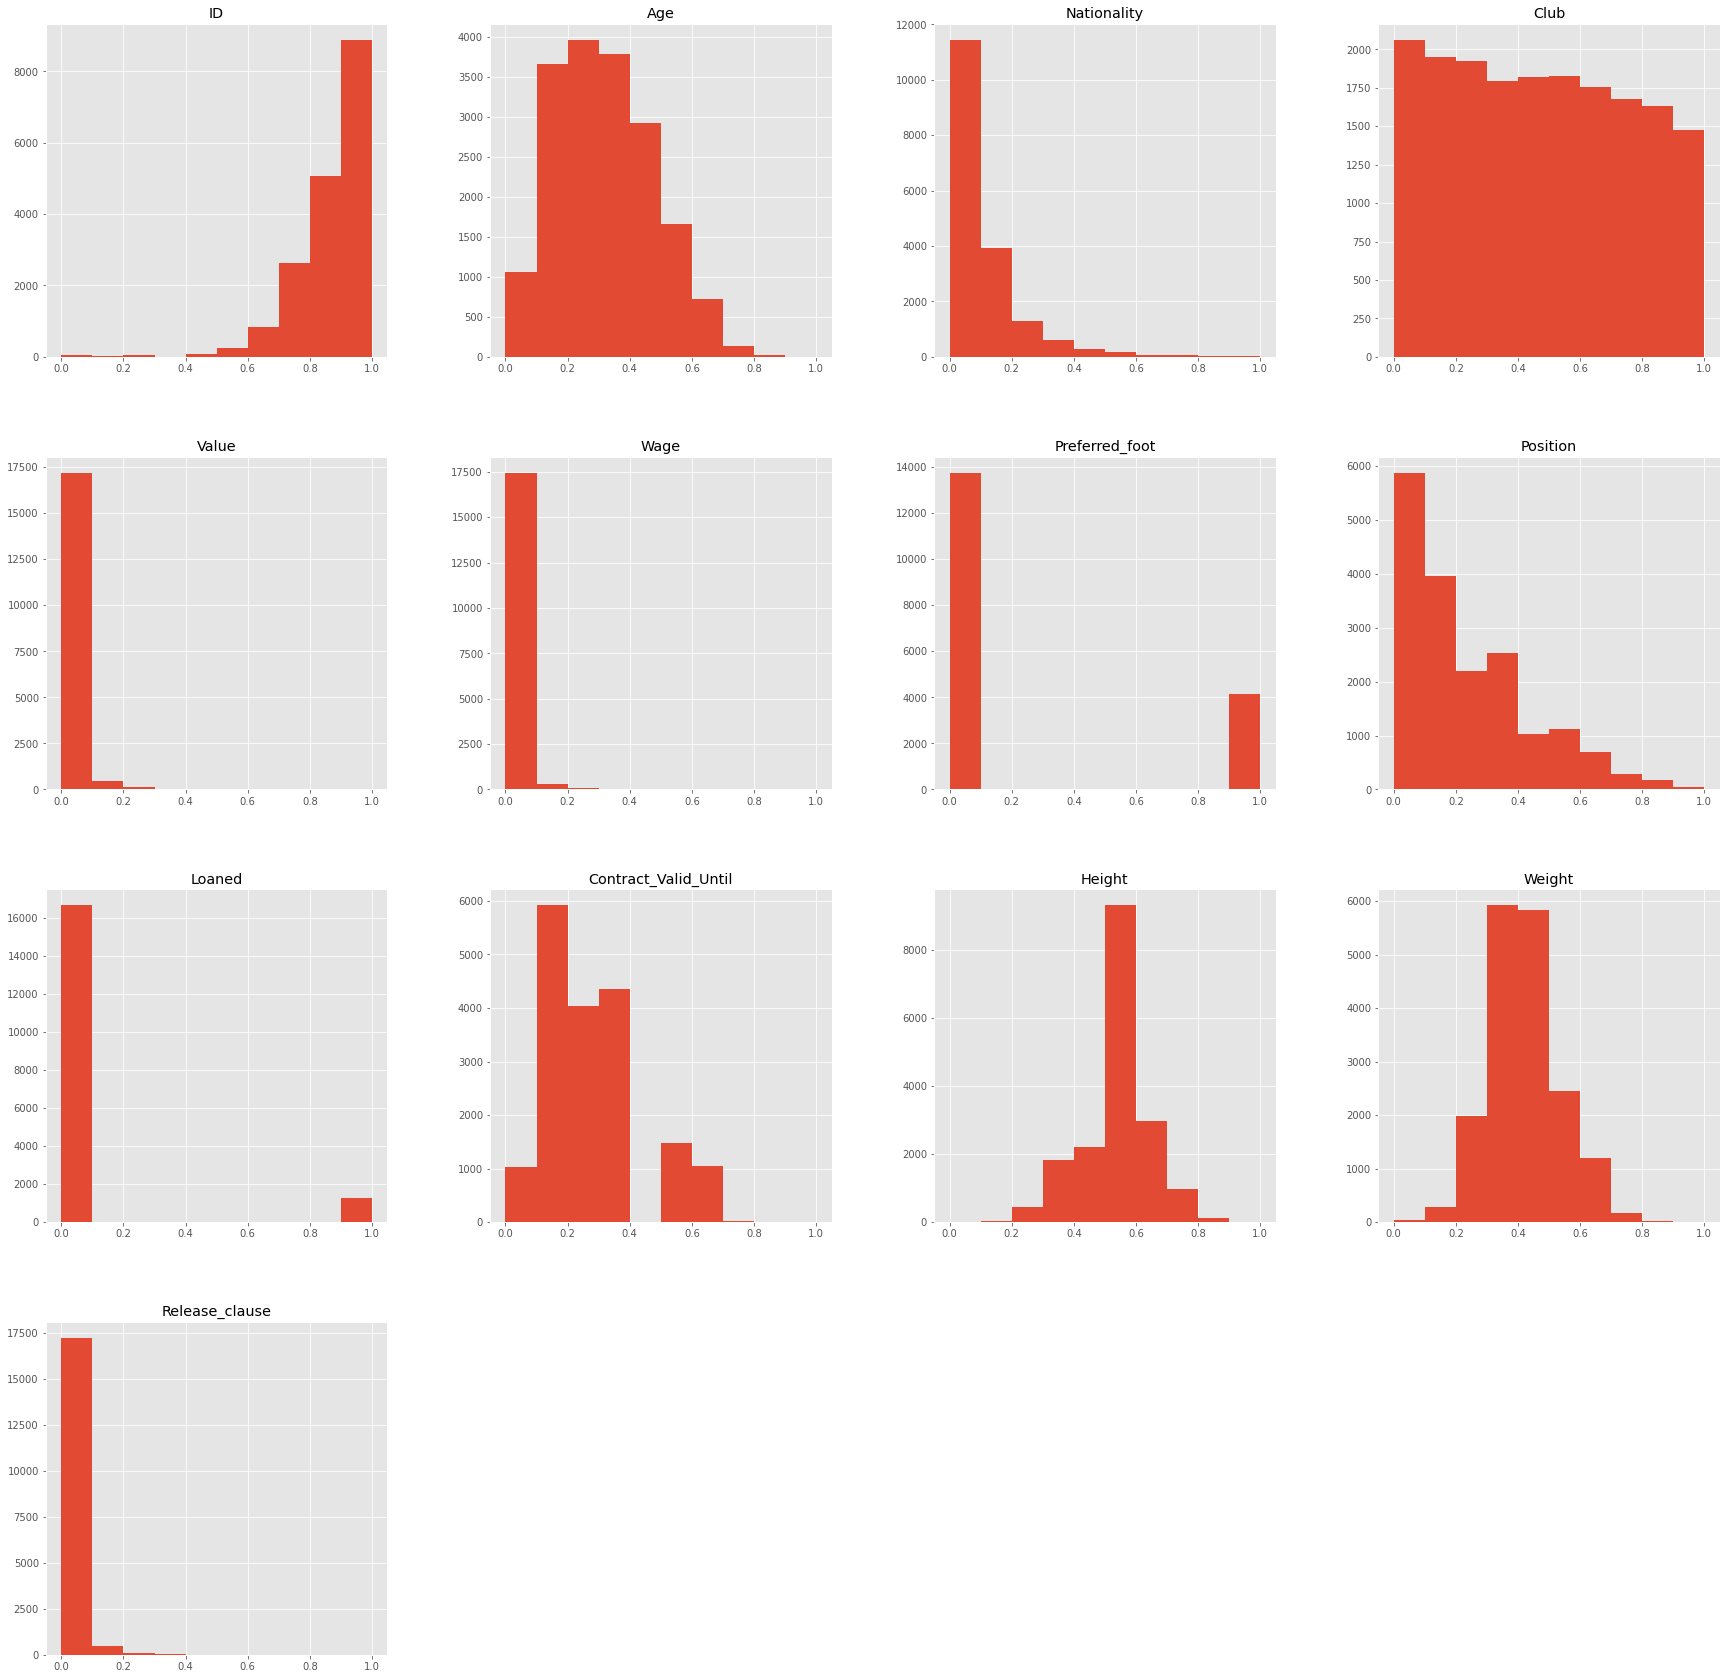

In [52]:
normalizedDataframe.hist(figsize=(30,30))
plt.show()

Como segundo paso, se visualiza las gráficas de tipo dispersión todas las columnas a excepción de la columna **ID** común.

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Age**.

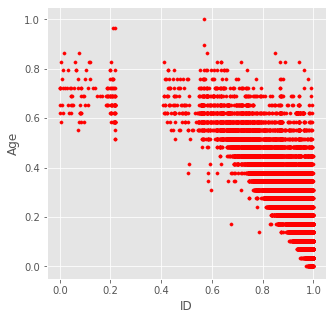

In [53]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Age', s = 10, c = 'red', figsize=(5,5));
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Nationality**.

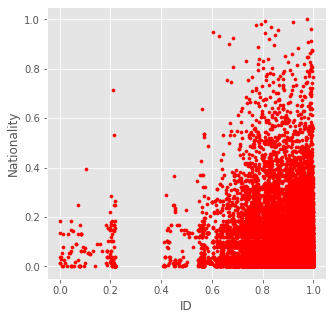

In [54]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Nationality', s = 10, c = 'red', figsize=(5,5));
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Club**.

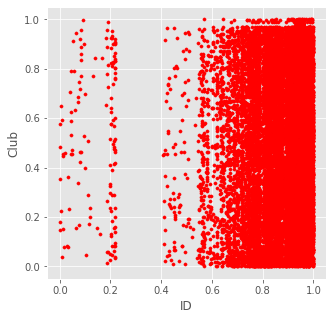

In [55]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Club', s = 10, c = 'red', figsize=(5,5));
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Value**.

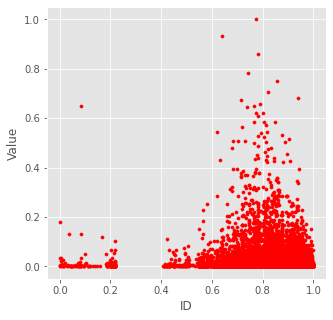

In [56]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Value', s = 10, c = 'red', figsize=(5,5));
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Wage**.

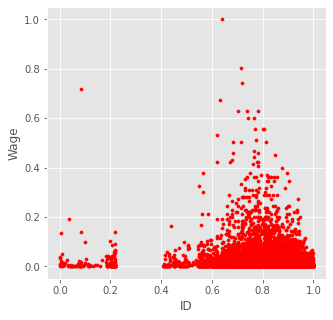

In [57]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Wage', s = 10, c = 'red', figsize=(5,5));
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Preferred_foot**.

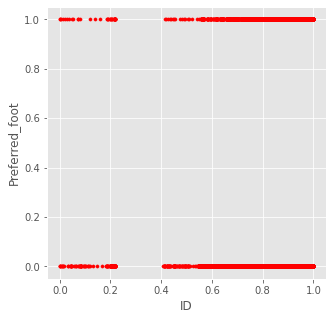

In [58]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Preferred_foot', s = 10, c = 'red', figsize=(5,5));
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Position**.

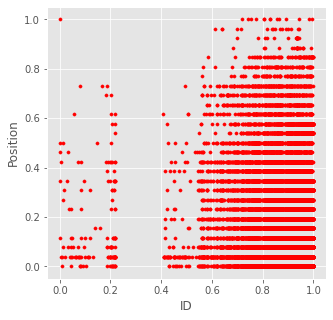

In [59]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Position', s = 10, c = 'red', figsize=(5,5));
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Loaned**.

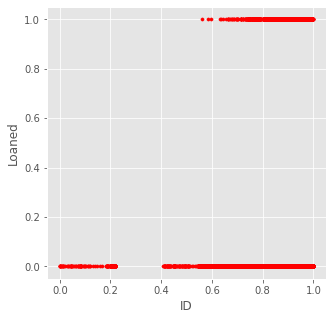

In [60]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Loaned', s = 10, c = 'red', figsize=(5,5));
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Contract_Valid_Util**.

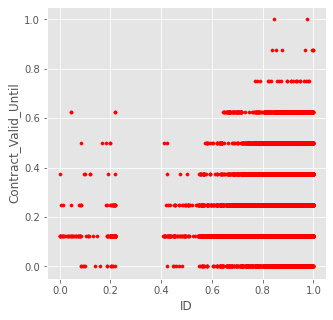

In [61]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Contract_Valid_Until', s = 10, c = 'red', figsize=(5,5));
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Heigth**.

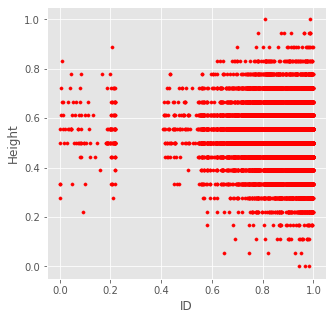

In [62]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Height', s = 10, c = 'red', figsize=(5,5));
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Weight**.

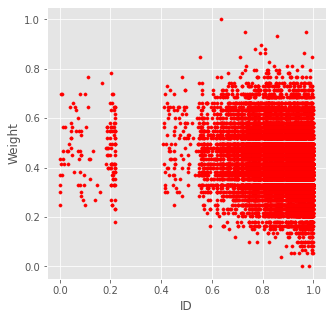

In [63]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Weight', s = 10, c = 'red', figsize=(5,5));
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Release_clause**.

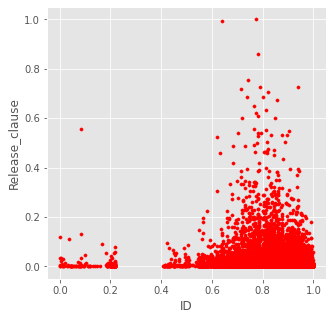

In [64]:
normalizedDataframe.plot.scatter(x = 'ID', y = 'Release_clause', s = 10, c = 'red', figsize=(5,5));
plt.show()

Como último paso, se visualiza la gráfica de tipo correlación para observar las relaciones mas significativas entre las columnas del dataframe normalizado.

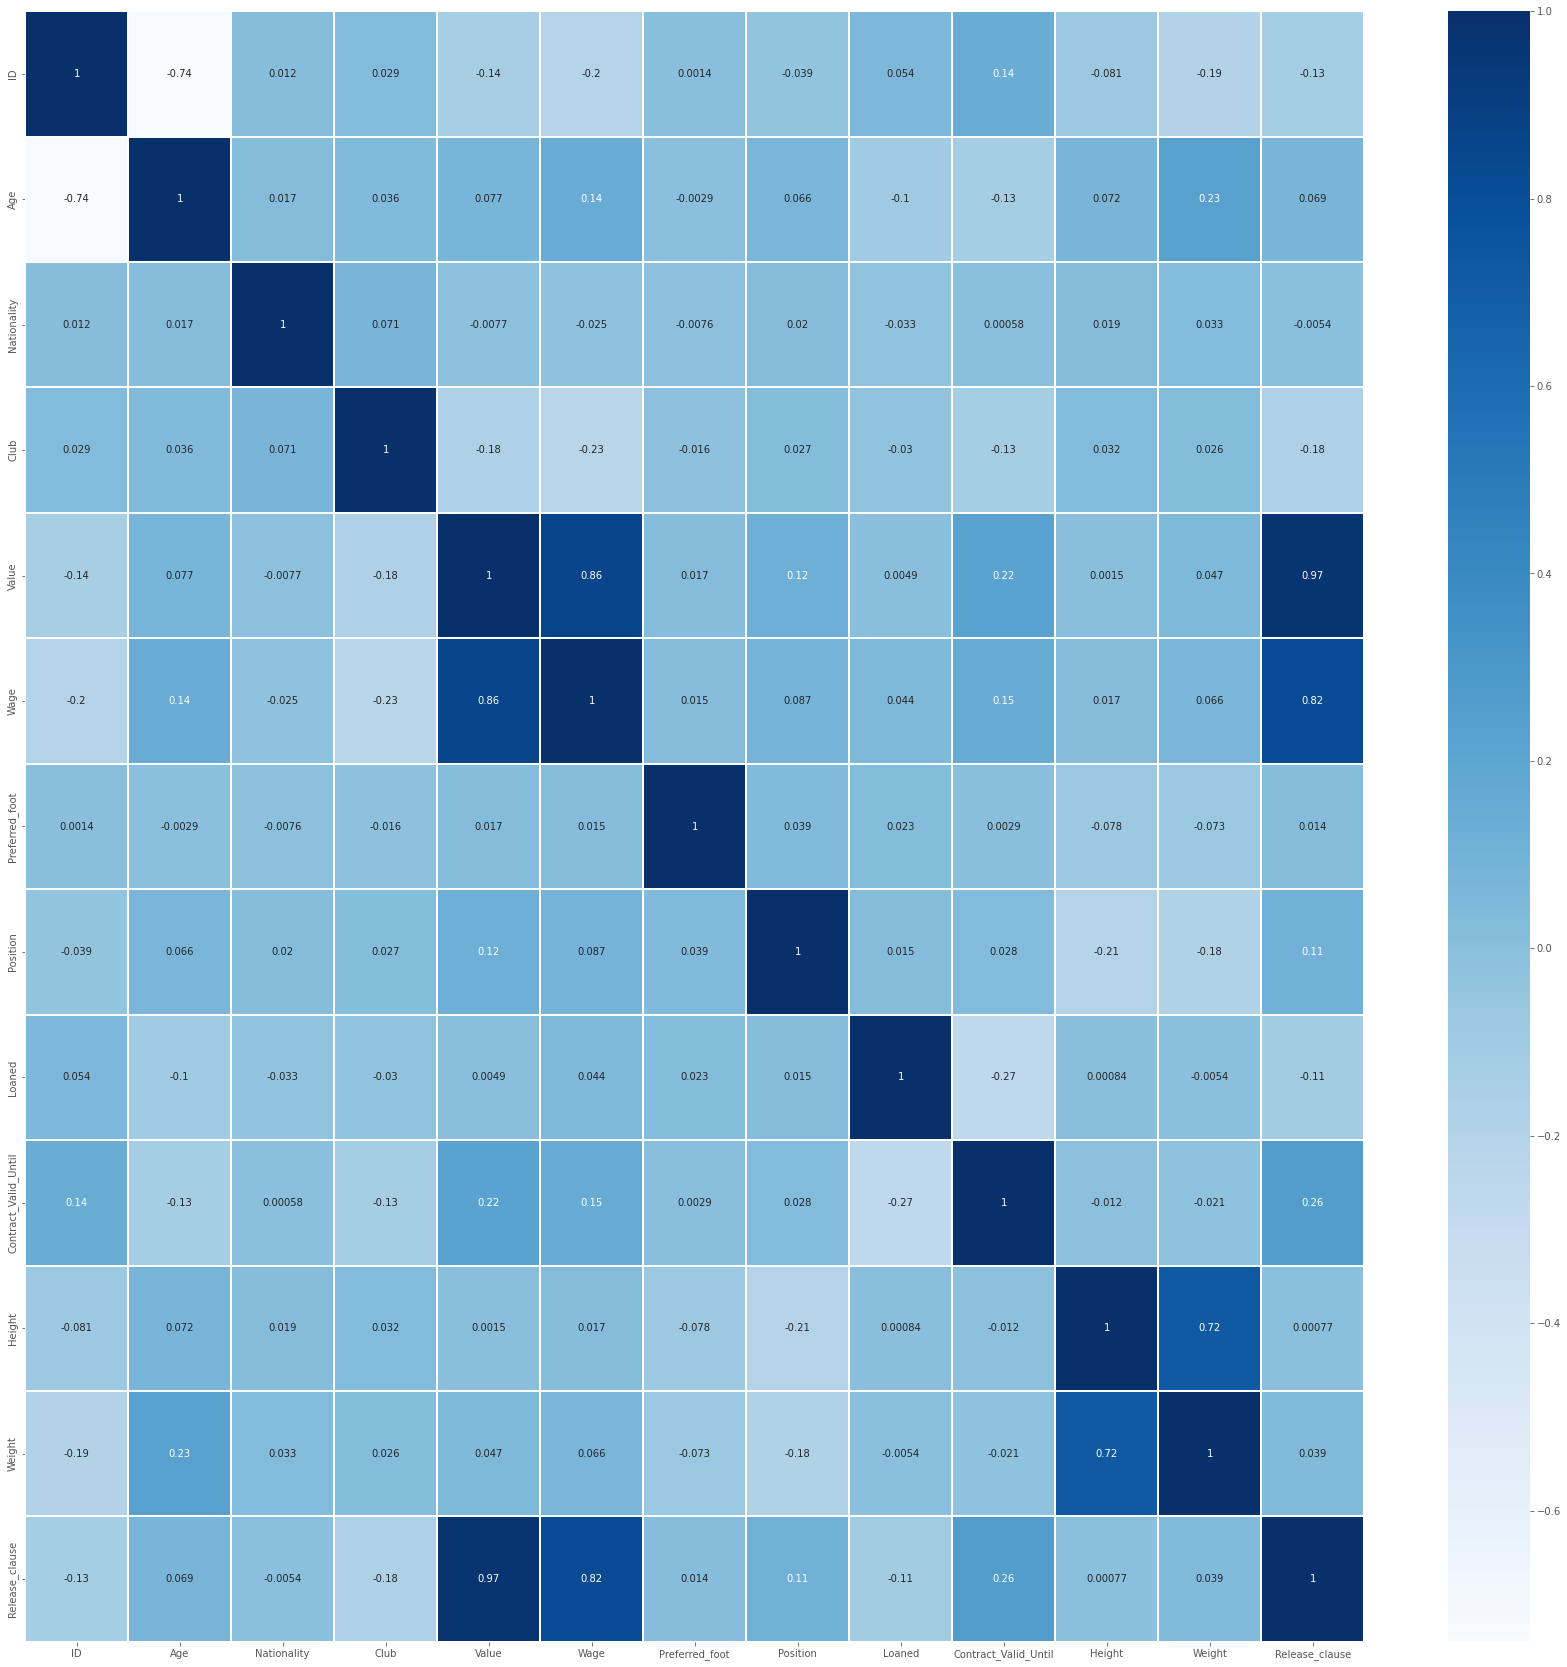

In [65]:
plt.figure(figsize=(30,30))
sb.heatmap(normalizedDataframe.corr(), cmap ='Blues', linewidths = 0.30, annot = True)
plt.show()